World Happiness Report
Problem Statement:

Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.preprocessing import power_transform
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats.mstats import normaltest
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import roc_curve
from sklearn.metrics  import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

importing required libraries

In [2]:
ds = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
ds

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
ds.shape

(158, 12)

In [4]:
ds.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
ds.columns = ds.columns.str.replace(' ', '_')
ds.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy_(GDP_per_Capita)', 'Family',
       'Health_(Life_Expectancy)', 'Freedom', 'Trust_(Government_Corruption)',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [7]:
#Detect Missing Values
ds.isnull().sum()     

Country                          0
Region                           0
Happiness_Rank                   0
Happiness_Score                  0
Standard_Error                   0
Economy_(GDP_per_Capita)         0
Family                           0
Health_(Life_Expectancy)         0
Freedom                          0
Trust_(Government_Corruption)    0
Generosity                       0
Dystopia_Residual                0
dtype: int64

No Missing Values

In [8]:
ds.duplicated().sum()

0

No Duplicate values

In [9]:
#dropping duplicate rows if any  and resetting index
ds=ds.drop_duplicates()
print('Number of rows after removing duplicates=', len(ds))

Number of rows after removing duplicates= 158


<AxesSubplot:>

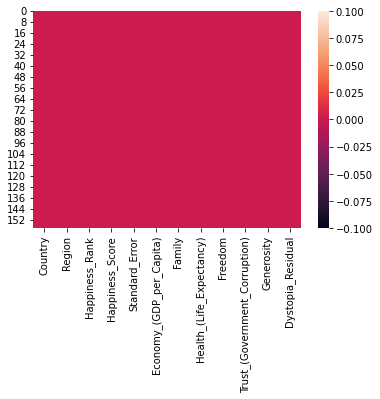

In [10]:
sns.heatmap(ds.isnull())

In [11]:
ds.duplicated().sum()

0

# EDA

In [12]:
ds

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


 minimum happiness score is 2.839 and maximaum happiness score is 7.587.

Data visuialization

Univariate Analysis

<AxesSubplot:xlabel='Country', ylabel='Happiness_Score'>

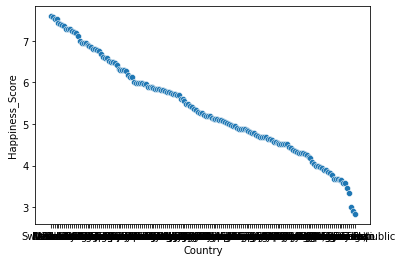

In [13]:
sns.scatterplot(x='Country',y='Happiness_Score',data=ds)

<AxesSubplot:xlabel='Region', ylabel='Happiness_Score'>

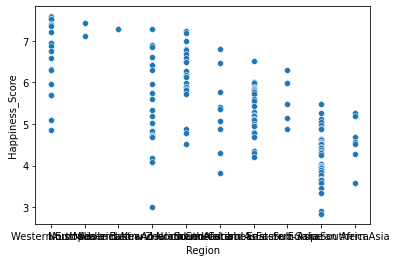

In [14]:
sns.scatterplot(x='Region',y='Happiness_Score',data=ds)

<AxesSubplot:xlabel='Economy_(GDP_per_Capita)', ylabel='Happiness_Score'>

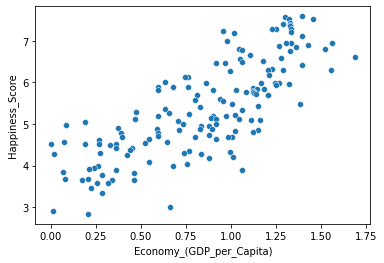

In [15]:
sns.scatterplot(x='Economy_(GDP_per_Capita)',y='Happiness_Score',data=ds)

<AxesSubplot:xlabel='Economy_(GDP_per_Capita)', ylabel='Happiness_Score'>

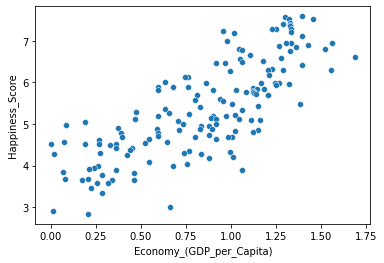

In [16]:
sns.scatterplot(x='Economy_(GDP_per_Capita)',y='Happiness_Score',data=ds)

<AxesSubplot:xlabel='Family', ylabel='Happiness_Score'>

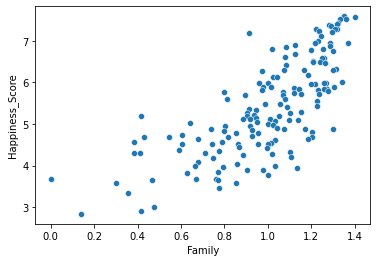

In [17]:
sns.scatterplot(x='Family',y='Happiness_Score',data=ds)

<AxesSubplot:xlabel='Health_(Life_Expectancy)', ylabel='Happiness_Score'>

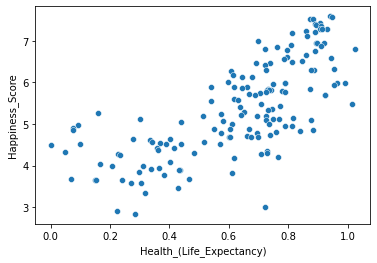

In [18]:
sns.scatterplot(x='Health_(Life_Expectancy)',y='Happiness_Score',data=ds)

<AxesSubplot:xlabel='Freedom', ylabel='Happiness_Score'>

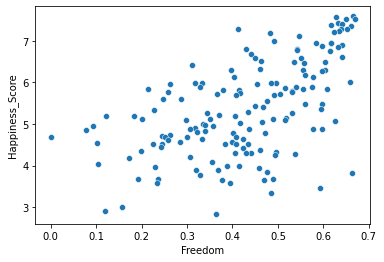

In [19]:
sns.scatterplot(x='Freedom',y='Happiness_Score',data=ds)

<AxesSubplot:xlabel='Generosity', ylabel='Happiness_Score'>

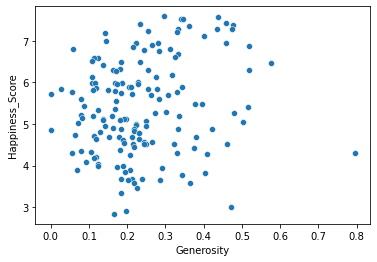

In [20]:
sns.scatterplot(x='Generosity',y='Happiness_Score',data=ds)

<AxesSubplot:xlabel='Trust_(Government_Corruption)', ylabel='Happiness_Score'>

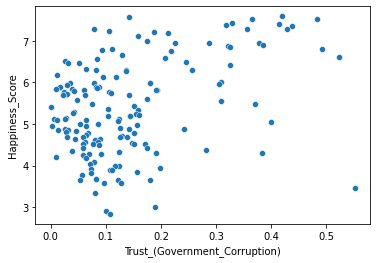

In [21]:
sns.scatterplot(x='Trust_(Government_Corruption)',y='Happiness_Score',data=ds)

array([[<AxesSubplot:title={'center':'Happiness_Rank'}>,
        <AxesSubplot:title={'center':'Happiness_Score'}>,
        <AxesSubplot:title={'center':'Standard_Error'}>],
       [<AxesSubplot:title={'center':'Economy_(GDP_per_Capita)'}>,
        <AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'Health_(Life_Expectancy)'}>],
       [<AxesSubplot:title={'center':'Freedom'}>,
        <AxesSubplot:title={'center':'Trust_(Government_Corruption)'}>,
        <AxesSubplot:title={'center':'Generosity'}>],
       [<AxesSubplot:title={'center':'Dystopia_Residual'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

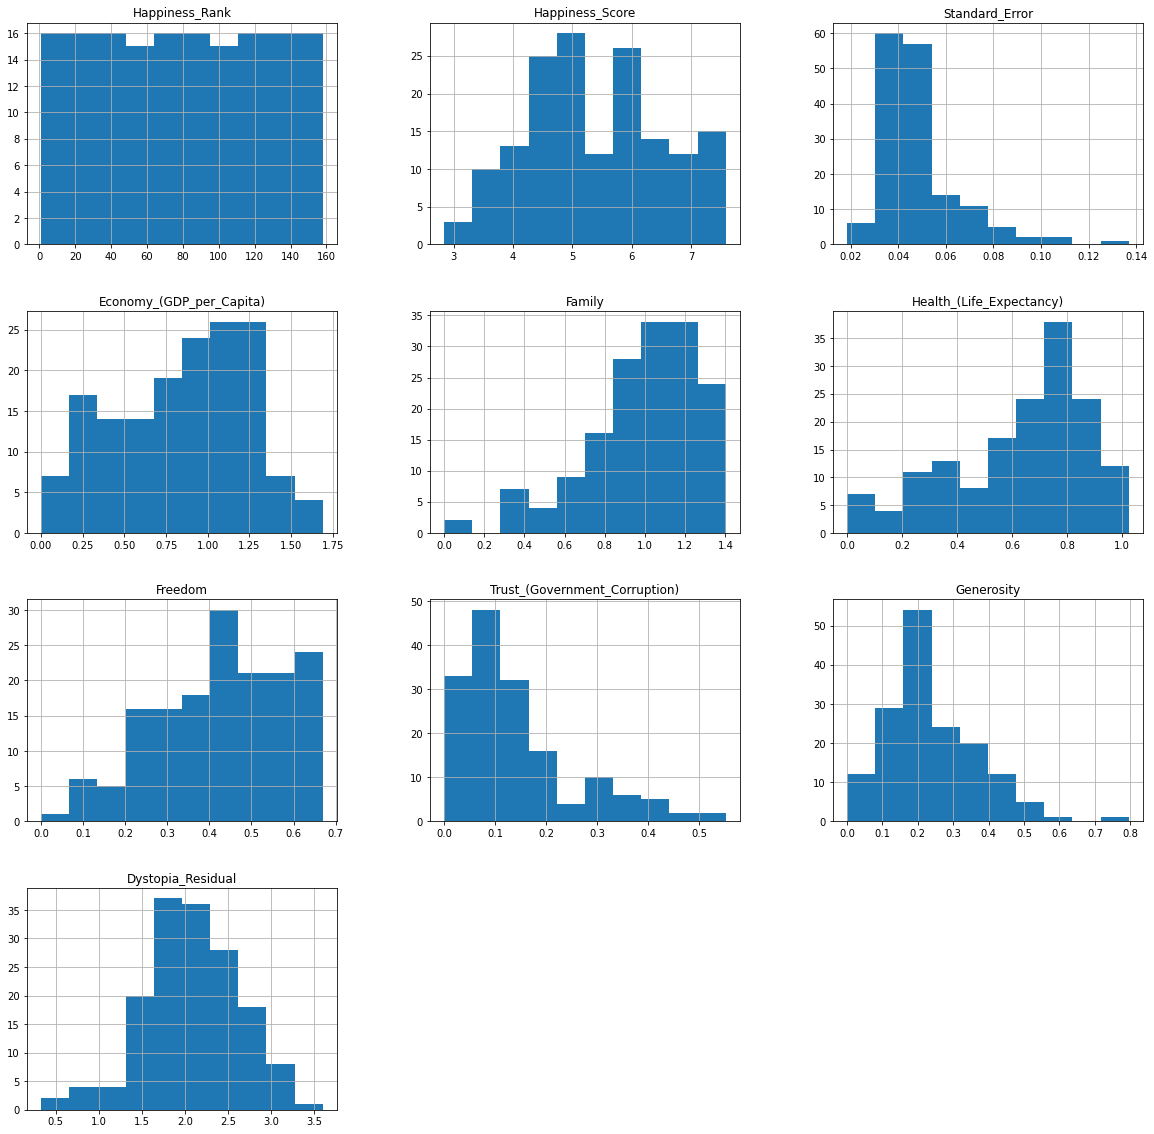

In [22]:
ds.hist(bins=10, figsize=(20,20))

# Multivarate 

<AxesSubplot:xlabel='Family', ylabel='Health_(Life_Expectancy)'>

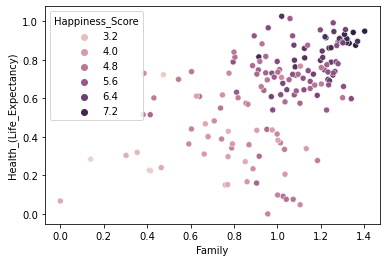

In [23]:
sns.scatterplot(x='Family',y='Health_(Life_Expectancy)',hue='Happiness_Score',data=ds)

<AxesSubplot:xlabel='Freedom', ylabel='Trust_(Government_Corruption)'>

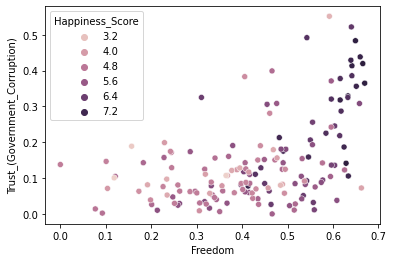

In [24]:
sns.scatterplot(x='Freedom',y='Trust_(Government_Corruption)',hue='Happiness_Score',data=ds) 

<Figure size 1800x2160 with 0 Axes>

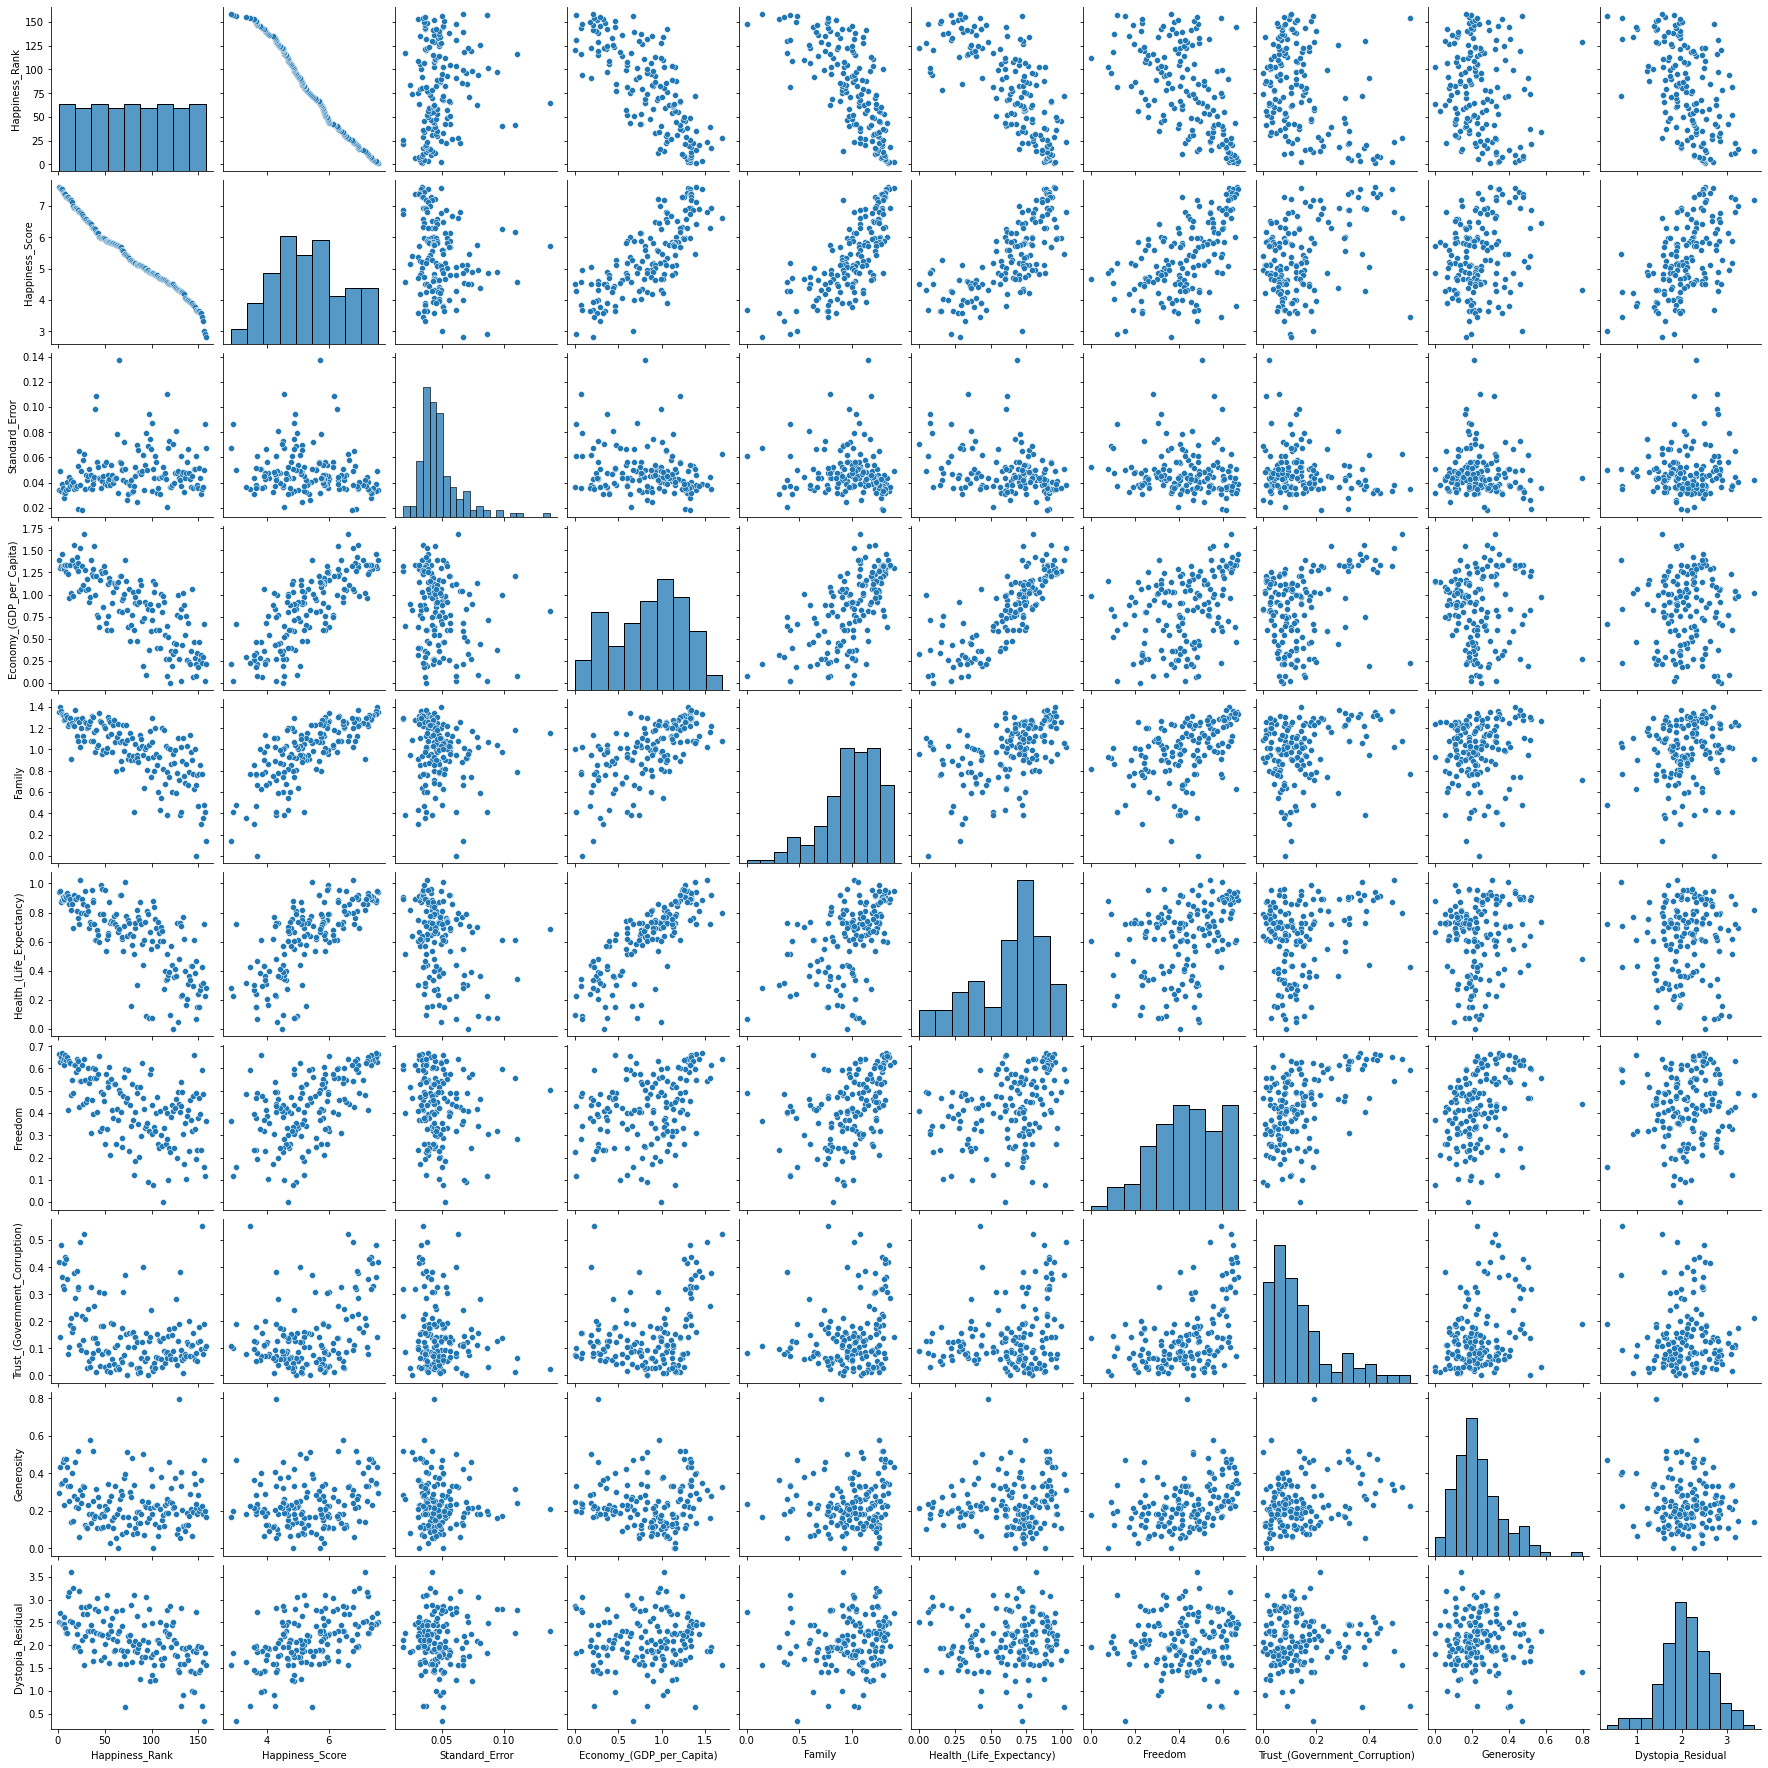

In [25]:
plt.figure(figsize=(25,30))
sns.pairplot(ds)
plt.show()

Outcome

Plot shows positive corelation between GDP and happiness score
Happiness score and life expectence is also in positive corelation,if people are getting good health care they are generally happy.
Except for generosity all other attributes are showing positive corelation to happiness score.

Drop all categorical features

In [26]:
ds1=ds.drop(['Country','Region','Happiness_Rank'],axis=1)
ds1

,Happiness_Score,Standard_Error,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


[Text(0.5, 1.0, 'Happiness_Score'),
 Text(0.5, 0, 'Family'),
 Text(0, 0.5, 'Health_(Life_Expectancy)')]

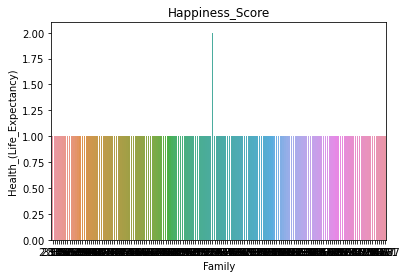

In [27]:
plt = sns.countplot(x='Happiness_Score',data=ds1)
plt.set(title='Happiness_Score',xlabel='Family',ylabel='Health_(Life_Expectancy)')

<AxesSubplot:xlabel='Health_(Life_Expectancy)', ylabel='Happiness_Score'>

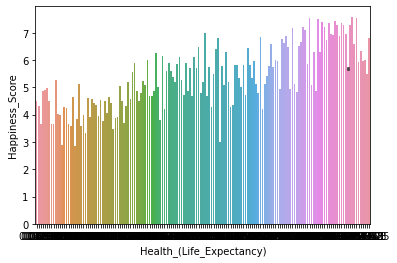

In [28]:
sns.barplot(x='Health_(Life_Expectancy)',y='Happiness_Score',data=ds)
#Volatile acidity has negative relation with quality.

<AxesSubplot:xlabel='Freedom', ylabel='Happiness_Score'>

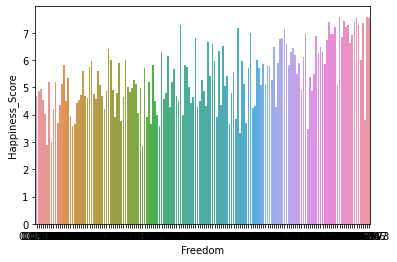

In [29]:
sns.barplot(x='Freedom',y='Happiness_Score',data=ds)
#citric acid has positive relation with quality.

<AxesSubplot:xlabel='Trust_(Government_Corruption)', ylabel='Happiness_Score'>

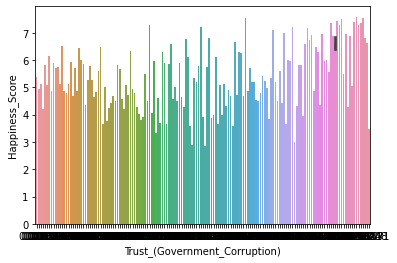

In [30]:
sns.barplot(x='Trust_(Government_Corruption)',y='Happiness_Score',data=ds)
#citric acid has positive relation with quality.

<AxesSubplot:xlabel='Trust_(Government_Corruption)', ylabel='Happiness_Score'>

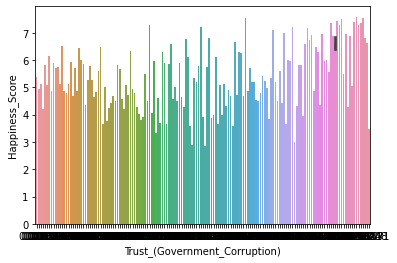

In [31]:
sns.barplot(x='Trust_(Government_Corruption)',y='Happiness_Score',data=ds)
#citric acid has positive relation with quality.

<AxesSubplot:xlabel='Generosity', ylabel='Happiness_Score'>

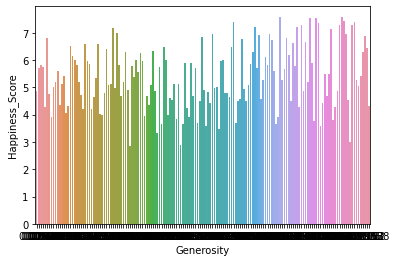

In [32]:
sns.barplot(x='Generosity',y='Happiness_Score',data=ds)
#free sulphur dioxide has positive relation with the quality.

<AxesSubplot:xlabel='Dystopia_Residual', ylabel='Happiness_Score'>

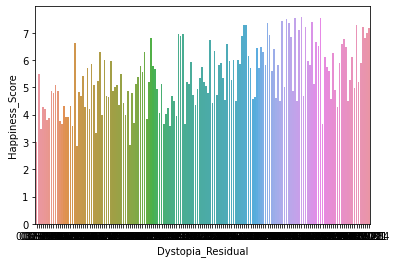

In [33]:
sns.barplot(x='Dystopia_Residual',y='Happiness_Score',data=ds)
#total sulphur dioxide has positive relation with the quality.

AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

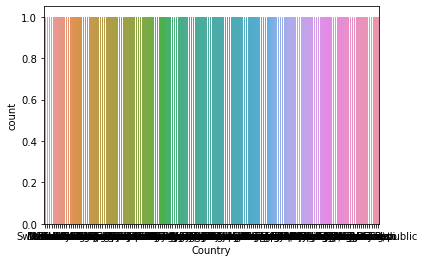

In [34]:
for column in ds.columns:
    sns.countplot(x=column, data=ds)
    plt.xlabel(column)
    plt.ylabel('Happiness_Score')
    plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

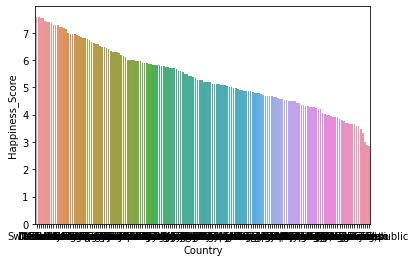

In [35]:
for column in ds.columns:
    sns.barplot(x=column, y='Happiness_Score', data=ds)
    plt.xlabel(column)
    plt.show()

Now Lets See that counts of each columns

In [ ]:
for i in ds1.columns:
        print(ds1[i].value_counts())
        print('*'*100)

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(ds1.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

lighter colour shows more positive corelation and darker colour shows negitive corelation.

Standard error shows negitive corelation compare to all other attributes.

In [ ]:
#checking the columns which are positively and negatively correlated
plt.figure(figsize=(25,30))
ds1.corr()['Happiness_Score'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

In [ ]:
ds1.corr()

In [ ]:
ds1.corr()['Happiness_Score'].sort_values()

All the datasets are different and have no Multicollinearity

# DESCRIPTIVE STATSTICS

In [ ]:
ds1.describe().T

In [ ]:
plt.figure(figsize = (22,7))
sns.heatmap(ds1.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

Outcome of describe() of dataset :-
from the above plotting we are determining mean,standard deviation,minimum,25%,50%,75% percentle and maximum value of each column

Total number rows and column in dataset

Rows :- 1359
columns :- 12

Economy_(GDP_per_Capita)==(Mean,std,minimum,25%,50%,75% ,Maximum)=0.846137,0.403121,0.00000,0.545808,0.910245	1.158448,1.69042

Family==(Mean,std,minimum,25%,50%,75% ,Maximum)=0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223

Health_(Life_Expectancy)==(Mean,std,minimum,25%,50%,75% ,Maximum)=0.630259,0.247078,0.00000,0.439185,0.696705	0.811013,1.02525

Freedom==(Mean,std,minimum,25%,50%,75% ,Maximum)=0.428615,0.150693,,0.00000,0.328330,0.435515,0.549092,0.66973

Trust_(Government_Corruption)==(Mean,std,minimum,25%,50%,75% ,Maximum)=0.143422,0.120034,0.00000,0.061675,0.107220	0.180255,0.55191

Generosity==(Mean,std,minimum,25%,50%,75% ,Maximum)=0.23729,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588

TDystopia_Residual==(Mean,std,minimum,25%,50%,75% ,Maximum)==2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


In [ ]:
ds1.info()

OUTLIERS CHECKING(Any One outlier method can be  used)

In [ ]:
colmlist=ds1.columns.values
ncol=30
nrows=14

In [ ]:
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(colmlist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data= ds1[colmlist[i]],color='green',orient='v')
    plt.tight_layout()

In [ ]:
# to find out outliers in the dataset
ds1.plot(kind='box',subplots=True,figsize=(20,10))

In [ ]:
ds1.skew()

In [ ]:
#Lets plot all using Histogram and see the skewness again
 
#plt.rcParams['figure.figsize']=(20,20)
ds1.hist(bins=25,color='green',density=True,label='Value',histtype='bar')
plt.show()

In [ ]:
sns.distplot(ds1['Health_(Life_Expectancy)'])

In [ ]:
 sns.distplot(ds1['Freedom'])
    

In [ ]:
sns.distplot(ds1['Trust_(Government_Corruption)'])
    

the data of the column is not normalised ...The building block is out of normalized curve..It a right skewed data..
we can see that the data is not normally distributed

Normal distribution curve of outcome column is irrelevent

In [ ]:
sns.distplot(ds1['Generosity'])
    

In [ ]:
sns.distplot(ds1['Dystopia_Residual'])

In [ ]:
#to check for outliers through zscore 
from scipy.stats import zscore
(np.abs(zscore(ds1)) < 3).all()

In [ ]:
#to remove outliers in data set through zscore
z = np.abs(zscore(ds1))
z.shape

In [ ]:
threshold = 3
print(np.where(z>3))

In [ ]:
ds1_new=ds1[(z<3).all(axis=1)]
print(ds1.shape)
print(ds1_new.shape)

In [ ]:
ds1.shape

In [ ]:
ds1_new.shape

In [ ]:
print ("Old DataFrame =",ds1.shape)
print ("New DataFrame =",ds1_new.shape)
print ("Total dropped rows = ",ds1.shape[0] - ds1_new.shape[0])

In [ ]:
#to find % loss in data
loss = (158-149)/158 * 100
print(loss)

In [ ]:
ds1_new

In [ ]:
# Independent column

x=ds1_new.iloc[:,2:]
x

In [ ]:
x.shape

In [ ]:
# Target or dependent variable

y=ds1_new.iloc[:,0]
y

In [ ]:
y.shape

# TRANSFORMING DATA TO REMOVE SKEWNESS

In [ ]:
ds1.skew()

In [ ]:
from sklearn.preprocessing import power_transform
x_new=power_transform(ds1,method='yeo-johnson')
x_new

In [ ]:
pd.DataFrame(x_new).skew()

In [ ]:
# It will be a 2 dimensional data containg rows and columns

from sklearn.preprocessing import StandardScaler
#transforming my dataset into a standard normal distribution
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

In [ ]:
x.mean()

In [ ]:
x.std()

In [ ]:
ds1['Happiness_Score'].value_counts()

In [ ]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [ ]:
x.shape

In [ ]:
y.value_counts()

WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [ ]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [ ]:
vif_cal()

# No Multicollinearity is present in the dataset...Here we can observe all the columns have VIF less than 10 which means we are free from multicollinearity problem. Let's move to buliding machine learning models...


#spliting dataset into training(70%) and testing(30%)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=45)

In [ ]:
print('shape of x_train:',x_train.shape)
print('shape of y_train:',x_train.shape)
print('shape of x_test:',x_test.shape)
print('shape of y_test:',y_test.shape)

In [ ]:
x_train

In [ ]:
y_test

In [ ]:
x_test

In [ ]:
y_train

In [ ]:
#splitting the data into independent and dependent datasets
x = ds1.drop(['Happiness_Score'],axis = 1)
y = ds1['Happiness_Score']

In [ ]:
x

In [ ]:
y

In [ ]:
#testing to accpect null hypothsis or not
normaltest(ds1.Happiness_Score.values)

In [ ]:
#spliting dataset into training(70%) and testing(30%)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=45)

In [ ]:
models=[SVR(),DecisionTreeRegressor(),LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),AdaBoostRegressor()]

In [ ]:
maelist=[]
mselist=[]
rmselist=[]
r2list=[]
def create_model(model):
    m=model
    m.fit(x_train,y_train)
    p=m.predict(x_test)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    mae=mean_absolute_error(p,y_test)
    mse=mean_squared_error(p,y_test)
    rmse=np.sqrt(mean_squared_error(p,y_test))
    r2=r2_score(y_test,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    plt.figure(figsize=(10,10))
    sns.regplot(y_test,predm,color="purple")
    plt.show()
    print(m)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')

In [ ]:
for i in models:
    create_model(i)

In [ ]:
# Linear Regression

lg_param = {'copy_X' : [True,False],'fit_intercept' : [True,False],'n_jobs' : [1,2,3,4,5,6,7,8,9,10], 'positive' : [True,False]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
RSCV = RandomizedSearchCV(LinearRegression(),lg_param, cv=5)

In [ ]:
RSCV.fit(x_train, y_train)

In [ ]:
RSCV.best_params_

In [ ]:
Final_Model = LinearRegression(positive=True,n_jobs=10, fit_intercept=True, copy_X=True)
Classifier = Final_Model.fit(x_train, y_train)
lr_pred = Final_Model.predict(x_test)
lr_r2_score = r2_score(y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Final Model is:", lr_r2_score*100)

In [ ]:
Final_Model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
Param={'fit_intercept':[True,False],'copy_X':[True,False],'n_jobs':[1,2,3,4,5,6,7,8,9,10]}

In [ ]:
GSCV=GridSearchCV(LinearRegression(),Param,cv=5)

In [ ]:
GSCV.fit(x_train,y_train)

In [ ]:
last_model=LinearRegression(copy_X=True,fit_intercept=True, n_jobs=1,)
CLassifer=last_model.fit(x_train,y_train)
lr_pred=last_model.predict(x_test)
lr_r2_score = r2_score(y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Final Model is:", lr_r2_score*100)

In [ ]:
last_model

CROSS VALIDATION FOR LOGISTICS REGRESSION,ENSEMBLE TECHNIQUE(GradientBoostingClassifier,RandomForestClassifier)

Regularization

In [ ]:
# to improve accuracy of model
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [ ]:
lasso= Lasso(alpha=0.0001)

In [ ]:
lasso.fit(x_train,y_train)

In [ ]:
lasso.score(x_train,y_train)

In [ ]:
lasso_pred=lasso.predict(x_test)

In [ ]:
r2_score(y_test,lasso_pred)

In [ ]:
ridge=Ridge(alpha=0.1)

In [ ]:
ridge.fit(x_train,y_train)

In [ ]:
ridge.score(x_train,y_train)

In [ ]:
ridge_pred=ridge.predict(x_test)

In [ ]:
r2_score(y_test,ridge_pred)

Hyper parameter tuning on the best ML Model


In [ ]:
# saving the model
import joblib
joblib.dump(Final_Model,'Happiness Final.pkl')

In [ ]:
#Loading the saved model
HS=joblib.load('Happiness Final.pkl')

In [ ]:
prediction = HS.predict(x_test)
prediction

In [ ]:
pd.DataFrame([HS.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [ ]:
import pickle
filename = 'Happiness Final.pkl'
pickle.dump(Final_Model,open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test,y_test)*100
print(result)